Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão: 1.0


###Exercício 1 - Treinamento do modelo baseado em árvore de decisão
Neste exercício, você irá treinar um modelo de árvore de decisão utilizando o conjunto de dados MNIST. O objetivo é entender como funciona o processo de treinamento de um modelo de árvore de decisão e como ajustar os parâmetros para melhorar o desempenho do modelo.

Você irá:

- Carregar o conjunto de dados MNIST e pré-processar os dados, se necessário.
- Selecionar a biblioteca ou framework que você irá utilizar (por exemplo, Scikit-learn e/ou XGBoost).
- Configurar os parâmetros do modelo, como a profundidade da árvore, o número de características a considerar em cada nó, etc.
- Treinar o modelo utilizando o conjunto de dados de treinamento.

###Dicas:

Certifique-se de que os dados estejam pré-processados corretamente antes de treinar o modelo.
Ajuste os parâmetros do modelo, como a profundidade da árvore, para melhorar o desempenho do modelo.

###Passo 1: Carregar e Pré-processar o Conjunto de Dados MNIST
O conjunto de dados MNIST pode ser carregado diretamente do Scikit-learn. Ele contém 70.000 imagens de dígitos, cada uma de tamanho 28x28 pixels.

In [15]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar o conjunto de dados
digits = load_digits()

# Extrair dados e rótulos
X, y = digits.data, digits.target

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

###Passo 2: Configurar e Treinar o Modelo de Árvore de Decisão
Agora vamos configurar o modelo de árvore de decisão. É importante ajustar parâmetros como a profundidade máxima da árvore para evitar overfitting e melhorar o desempenho.

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Criar uma Decision Tree com profundidade máxima de 10
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Avaliar o modelo no conjunto de teste
accuracy = clf.score(X_test, y_test)
print("Precisão no conjunto de teste:", accuracy)


Precisão no conjunto de teste: 0.8527777777777777


###Passo 3: Ajustar os Parâmetros do Modelo
Ajustar parâmetros como max_depth, min_samples_split, e min_samples_leaf pode melhorar o desempenho do modelo. Aqui está como você pode fazer isso:

In [17]:
# Criar uma Decision Tree com parâmetros ajustados
clf_optimized = DecisionTreeClassifier(max_depth=15, min_samples_split=20, min_samples_leaf=10, random_state=42)

# Treinar o modelo otimizado
clf_optimized.fit(X_train, y_train)

# Avaliar o modelo otimizado no conjunto de teste
accuracy_optimized = clf_optimized.score(X_test, y_test)
print("Precisão no conjunto de teste após otimização:", accuracy_optimized)

Precisão no conjunto de teste após otimização: 0.8472222222222222


###Exercício 2 - Avaliação dos ganhos com a utilização de modelos Ensemble
Neste exercício, você irá avaliar os ganhos obtidos ao utilizar modelos Ensemble em comparação com o modelo de árvore de decisão simples. Você irá treinar um modelo Ensemble e comparar os resultados com o modelo de árvore de decisão treinado anteriormente.

###Dicas:

- Utilize diferentes tipos de modelos Ensemble, como Random Forest e XGBoost, para comparar os resultados.

###Passo 1: Configurar e Treinar um Modelo Random Forest
O modelo Random Forest utiliza múltiplas árvores de decisão e combina suas previsões para melhorar a precisão.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criar e treinar um modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_clf.fit(X_train, y_train)

# Prever com o modelo Random Forest
rf_y_pred = rf_clf.predict(X_test)

# Avaliar o modelo Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Precisão do Random Forest no conjunto de teste:", rf_accuracy)


Precisão do Random Forest no conjunto de teste: 0.9722222222222222


###Passo 2: Configurar e Treinar um Modelo XGBoost
XGBoost é um modelo de gradient boosting que também pode melhorar significativamente o desempenho em muitos casos.

In [19]:
from xgboost import XGBClassifier

# Criar e treinar um modelo XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, 
                        eval_metric='mlogloss', 
                        n_estimators=100, 
                        max_depth=10, 
                        random_state=42)

xgb_clf.fit(X_train, y_train)

# Prever com o modelo XGBoost
xgb_y_pred = xgb_clf.predict(X_test)

# Avaliar o modelo XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("Precisão do XGBoost no conjunto de teste:", xgb_accuracy)


/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:33:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precisão do XGBoost no conjunto de teste: 0.9694444444444444


###Comparação dos Resultados:

In [20]:
print(f"Precisão da Árvore de Decisão Simples: {accuracy:.2f}")
print(f"Precisão do Random Forest: {rf_accuracy:.2f}")
print(f"Precisão do XGBoost: {xgb_accuracy:.2f}")

Precisão da Árvore de Decisão Simples: 0.85
Precisão do Random Forest: 0.97
Precisão do XGBoost: 0.97


###Exercício 3 - Visualização da árvore de decisão e Medida de Impureza
Neste exercício, você irá explorar a estrutura da árvore de decisão e entender como a medida de impureza é utilizada para avaliar a qualidade das divisões nos nós da árvore. A medida de impureza é um conceito fundamental em árvores de decisão, pois ajuda a determinar a melhor forma de dividir os dados em subconjuntos menores e mais homogêneos.

###Você irá:

- Visualizar a árvore de decisão treinada no exercício anterior, utilizando ferramentas como o Scikit-learn ou o Graphviz.
- Calcular a medida de impureza para diferentes conjuntos de dados e entender como ela impacta o desempenho do modelo.
- Analisar como a medida de impureza afeta a escolha dos atributos para dividir os dados em cada nó da árvore.
- Entender como a medida de impureza pode ser utilizada para evitar overfitting e melhorar a generalização do modelo.

###Parte 1: Visualização da Árvore de Decisão
Podemos usar a biblioteca Scikit-learn para visualizar a árvore de decisão. Isso nos ajuda a entender como o modelo faz divisões nos dados.

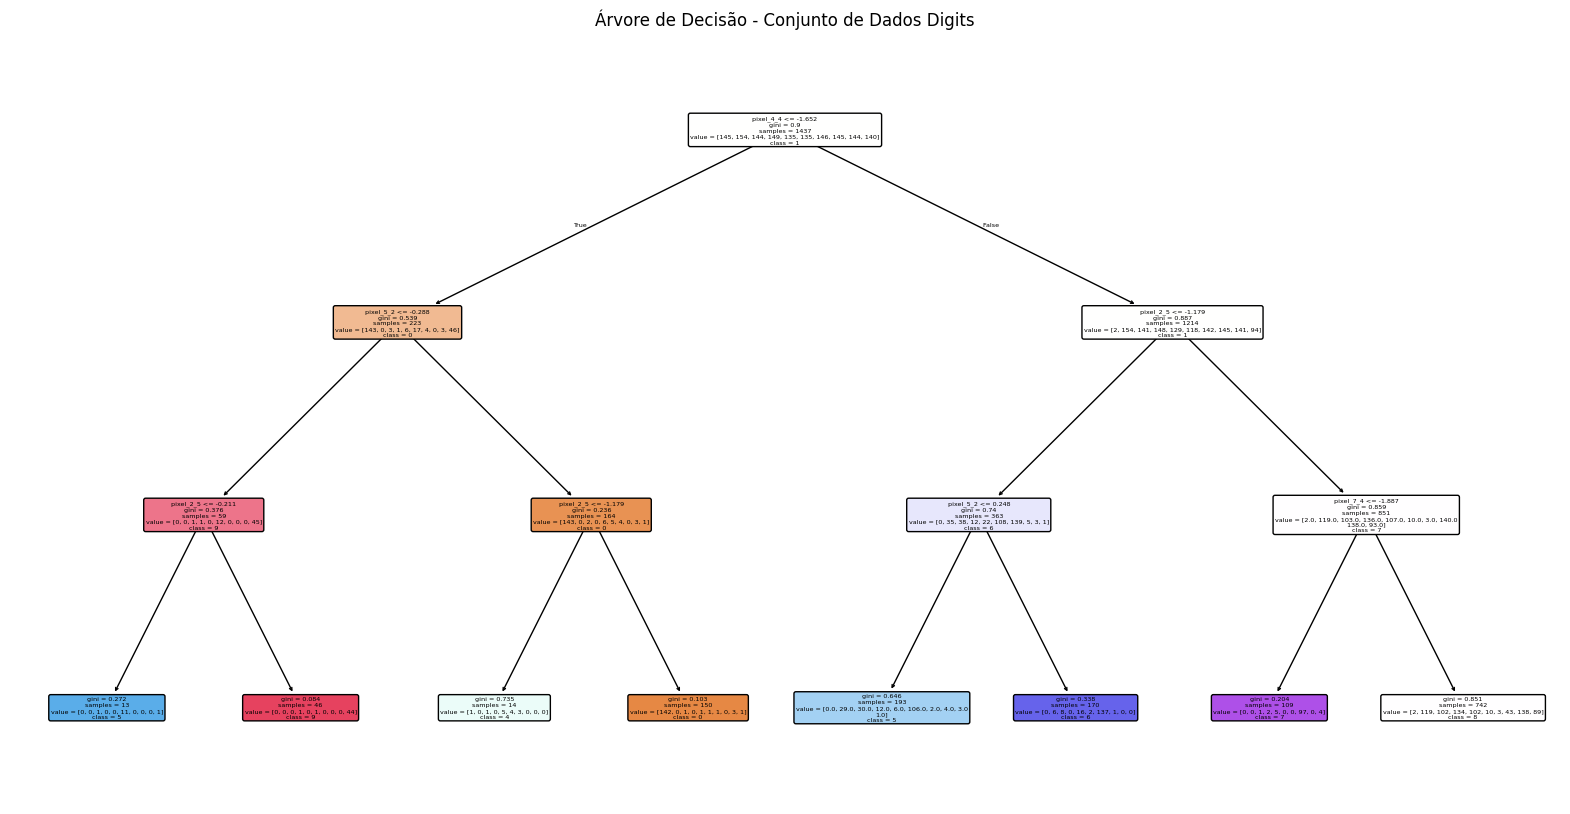

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Treinar novamente a árvore de decisão simples para visualização
clf_simple = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_simple.fit(X_train, y_train)

# Plotar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(clf_simple, filled=True, feature_names=digits.feature_names, class_names=digits.target_names.astype(str), rounded=True)
plt.title("Árvore de Decisão - Conjunto de Dados Digits")
plt.show()


###Parte 2: Medida de Impureza
A medida de impureza nos ajuda a avaliar a qualidade das divisões. Vamos calcular a impureza de Gini para nós específicos.

In [22]:
from sklearn.metrics import accuracy_score

# Função para calcular a impureza de Gini
def gini_impurity(y):
    unique, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    return 1 - np.sum(p ** 2)

# Exemplo: Calcular a impureza de Gini para o conjunto de teste
gini_test = gini_impurity(y_test)
print("Impureza de Gini no conjunto de teste:", gini_test)


Impureza de Gini no conjunto de teste: 0.8971913580246914


###Parte 3: Impacto da Impureza e Overfitting
A impureza impacta a escolha dos atributos para divisão e pode ajudar a evitar overfitting.

###Como a Impureza Afeta a Escolha dos Atributos
- Escolha dos Atributos: O atributo que resulta na maior redução de impureza é escolhido para dividir o nó.
- Evitar Overfitting: Ao limitar a profundidade da árvore ou usando o mínimo de amostras por folha, evitamos divisões excessivas que podem levar ao overfitting.

In [23]:
# Treinar a árvore de decisão com profundidade máxima limitada
clf_limited = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_limited.fit(X_train, y_train)

# Avaliar o modelo com profundidade limitada
limited_accuracy = clf_limited.score(X_test, y_test)
print("Precisão com profundidade limitada:", limited_accuracy)

Precisão com profundidade limitada: 0.6638888888888889
